# Study Case

dalam project ini kita gunakan data cal_housing.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_new = pd.read_csv('cal_housing.csv')
data_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data_new.corr()['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Kita akan gunakan median_income sebagai fitur untuk simple linear regression

## 1. Simple Linear Regression

In [8]:
X = data_new[['median_income']]
y = data_new['median_house_value']

In [9]:
clf = LinearRegression()
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state = 45)

In [12]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
clf.coef_

array([41592.72287437])

In [14]:
clf.intercept_

45755.69439773727

In [15]:
pred = clf.predict(X_test)

In [16]:
pred

array([145761.23727686, 152856.95579923, 233322.23747198, ...,
       152099.96824291, 137554.99305375, 277464.59425854])

In [17]:
pd.DataFrame({'actual':y_test,'prediction':pred})

,actual,prediction
3046,65800.0,145761.237277
6803,228400.0,152856.955799
10112,241100.0,233322.237472
3126,137500.0,144538.411224
5008,193000.0,202672.559986
12772,73100.0,126495.488041
17396,121400.0,165334.772662
18498,374600.0,213116.492700
10378,293200.0,303360.223520
17812,258100.0,271292.234184


#### Scoring

In [18]:
mean_squared_error(y_test,pred)

6961943499.279389

In [19]:
mean_absolute_error(y_test,pred)

62234.7264532076

In [20]:
r2_score(y_test,pred)

0.478717460936923

#### Plot

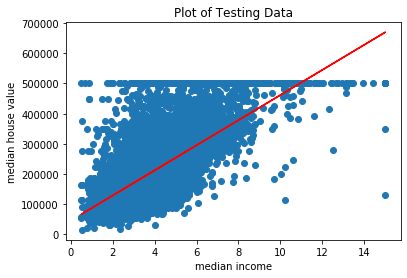

In [21]:
plt.scatter(X_test, y_test) #data aktual
plt.plot(X_test,pred,color = 'r') #model prediksi
plt.title('Plot of Testing Data')
plt.xlabel('median income')
plt.ylabel('median house value')
plt.show()

## 2. Multiple Linear Regression

In [27]:
pd.isnull(data_new).sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [29]:
data_new = data_new.fillna({'total_bedrooms':data_new['total_bedrooms'].median()})

In [30]:
X = data_new.drop(['median_house_value','ocean_proximity'], axis = 1)
y = data_new['median_house_value']

In [31]:
clf = LinearRegression()
clf

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=45)

In [33]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
clf.coef_

array([-4.34476971e+04, -4.32901855e+04,  1.13244372e+03, -7.61212172e+00,
        9.11527477e+01, -4.43274119e+01,  8.43859658e+01,  3.97030120e+04])

In [35]:
clf.intercept_

-3639743.546371448

In [36]:
pred_2 = clf.predict(X_test)

In [37]:
pd.DataFrame ({'actual':y_test, 'pred_1':pred, 'pred_2':pred_2})

,actual,pred_1,pred_2
3046,65800.0,145761.237277,140584.958666
6803,228400.0,152856.955799,168205.537165
10112,241100.0,233322.237472,232680.512853
3126,137500.0,144538.411224,52607.577746
5008,193000.0,202672.559986,241306.724765
12772,73100.0,126495.488041,109449.696496
17396,121400.0,165334.772662,206954.675584
18498,374600.0,213116.492700,216294.071230
10378,293200.0,303360.223520,291614.405833
17812,258100.0,271292.234184,260103.899007


In [38]:
mean_squared_error(y_test, pred_2)

5006442460.067068

In [39]:
mean_absolute_error(y_test, pred_2)

51332.110066940506

In [40]:
r2_score(y_test, pred_2)

0.6251375729310231